<font color='blue'>
Import Sci Toolkit (sklearn) and libraries for implementing regression models and measuring performance
</font>

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<font color='blue'>
Define function to import the Boston housing data. This will split the data into training and test
</font>

In [2]:
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)

<font color='blue'>
Load the Boston housing data Matrices X_train and X_test respectively which contain the independent variables values for training and test observations. Additionally y_train and y_test are lists containing value of the dependent variable (price) for training and test observations
</font>

In [3]:
X_train, X_test, y_train, y_test = load_boston()

<font color='blue'>
Perform Linear Regression on training data
</font>

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<font color='blue'>
Use Linear Regression model to predict values for test data
</font>

In [5]:
y_pred_LR = lr.predict(X_test)

<font color='blue'>
Measure performance using R Squared (R^2)
</font>

In [6]:
r2_LR = r2_score(y_test, y_pred_LR)
print("r^2 on test data for LR: %f" %r2_LR)

r^2 on test data for LR: 0.636961


<font color='blue'>
Measure performance using Mean Squared Error (MSE)
</font>

In [7]:
mse_LR = mean_squared_error(y_test, y_pred_LR)
print("MSE on test data for LR: %f" %mse_LR)

MSE on test data for LR: 26.148175


<font color='brown'>
Use LASSO for Modelling. <br>Set regularization parameter (alpha) to a starting value of 0.1
</font>

In [8]:
lasso = Lasso(alpha=0.1)

<font color='brown'>
Run LASSO to predict values for test data
</font>

In [9]:
y_pred_LASSO = lasso.fit(X_train, y_train).predict(X_test)

<font color='brown'>
Measure performance using R Squared (R^2)
</font>

In [10]:
r2_LASSO = r2_score(y_test, y_pred_LASSO)
print("r^2 on test data for LASSO: %f" %r2_LASSO)

r^2 on test data for LASSO: 0.633786


<font color='brown'>
Measure performance using Mean Square Error (MSE)
</font>

In [11]:
mse_LASSO = mean_squared_error(y_test, y_pred_LASSO)
print("MSE on test data for LASSO: %f" %mse_LASSO)

MSE on test data for LASSO: 26.376802


<font color='green'>
Adjust regularization parameter for LASSO.<br>
We will run LASSO for various values of alpha. For each of these we will evaluate performance using r^2 and MSE
</font>

In [12]:
alpha_list = [0.10, 0.01, 0.05, 0.15, 0.90, 0.75, 1.50, 4.00, 5.00, 6.00, 8.00, 10, 15]
r2_list = []
mse_list = []

<font color='green'>
Loop through values in alpha_list, compute r^2 & MSE and store then in respective lists
</font>

In [13]:
for val in alpha_list:
    ls = Lasso(alpha=val)
    y_pred_ls = ls.fit(X_train, y_train).predict(X_test)
    r2_score_ls = r2_score(y_test, y_pred_ls)
    mse_ls = mean_squared_error(y_test, y_pred_ls)
    r2_list.append(r2_score_ls)
    mse_list.append(mse_ls)

<font color='green'>
Plot r^2 against alpha
</font>

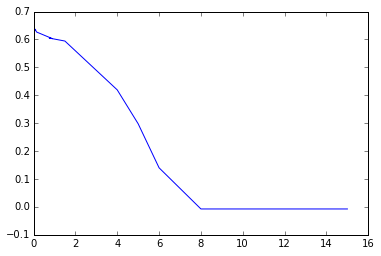

In [14]:
plot(alpha_list, r2_list)

<font color='blue'>
We find that for LASSO, as the value of alpha increases, the r^2 decreases to zero beyond approximate value of 8 for alpha
</font>

<font color='green'>
Plot MSE against alpha
</font>

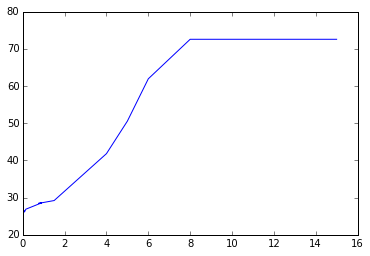

In [15]:
plot(alpha_list, mse_list)

<font color='blue'>
We find that for LASSO, as the value of alpha increases, the MSE increases and then stays steady beyond approximate value of 8 for alpha
</font>

<font color='green'>
We could use a middle of the road value for alpha such as 4 for LASSO
</font>

In [16]:
lasso_optimal = Lasso(alpha=4)
y_pred_LASSO_opt= lasso_optimal.fit(X_train, y_train).predict(X_test)
r2_LASSO_opt = r2_score(y_test, y_pred_LASSO_opt)
mse_LASSO_opt = mean_squared_error(y_test, y_pred_LASSO_opt)
print("r^2 on test data for LASSO with alpha=4: %f" %r2_LASSO_opt)
print("MSE on test data for LASSO with alpha=4: %f" %mse_LASSO_opt)

r^2 on test data for LASSO with alpha=4: 0.419445
MSE on test data for LASSO with alpha=4: 41.814892
